In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Regresión lineal

In [2]:
def linreg(x,y):
    try:
        return np.dot(np.linalg.inv(np.dot(x.T,x)), np.dot(x.T,y))
    except:
        return np.dot(np.linalg.pinv(np.dot(x.T,x)), np.dot(x.T,y))

$b = (X^TX)^{-1} X^T y$

## Income dataset

In [32]:
income = np.loadtxt('../data/income.csv',converters={0: lambda x: float(x)}, skiprows=1, usecols=[1,2],delimiter=',', encoding='utf-8')

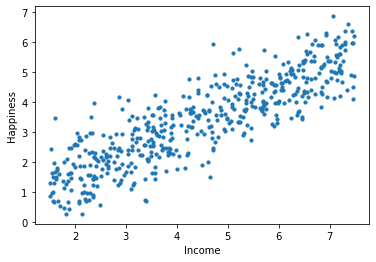

In [33]:
f ,ax = plt.subplots()
ax.scatter(income[:,0],income[:,1], s= 10)
ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

## Ordenada = 0

In [34]:
x,y = income[:,0], income[:,1]

In [35]:
b = np.dot(np.dot(x.T,x)**(-1), np.dot(x.T,y))

In [36]:
xspace = np.linspace(0,8,240)
y_hat = b * xspace

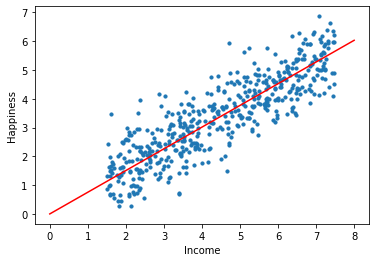

In [37]:
f ,ax = plt.subplots()
ax.scatter(income[:,0],income[:,1],s=10)
ax.plot(xspace,y_hat, color='red')

ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

$y = b x$

In [38]:
b

0.7535559714602557

## Ordenada $\neq$ 0

In [40]:
# Subimos los datos 3 unidades
y2 = y + 3

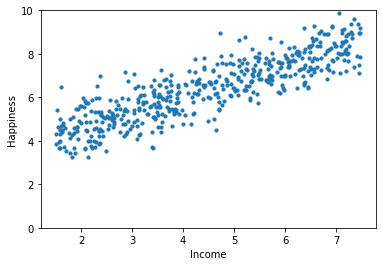

In [41]:
f ,ax = plt.subplots()
ax.scatter(x,y2, s=10)
ax.set_ylim(0,10)
ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

In [42]:
x2 = np.vstack((np.ones(x.shape),x)).T

In [43]:
x2

array([[1.        , 3.86264742],
       [1.        , 4.97938138],
       [1.        , 4.92395694],
       [1.        , 3.21437244],
       [1.        , 7.19640925],
       [1.        , 3.72964348],
       [1.        , 4.67451739],
       [1.        , 4.49810382],
       [1.        , 3.12163053],
       [1.        , 4.63991444],
       [1.        , 4.63283951],
       [1.        , 2.7731789 ],
       [1.        , 7.11947859],
       [1.        , 7.4666532 ],
       [1.        , 2.11774233],
       [1.        , 2.55916582],
       [1.        , 2.35479322],
       [1.        , 2.38815725],
       [1.        , 4.75568027],
       [1.        , 1.99427505],
       [1.        , 7.31091603],
       [1.        , 3.52831896],
       [1.        , 2.42875167],
       [1.        , 3.54274787],
       [1.        , 5.22720124],
       [1.        , 6.69199314],
       [1.        , 3.90040994],
       [1.        , 2.29105548],
       [1.        , 2.38051271],
       [1.        , 2.54960878],
       [1.

In [48]:
b2 = linreg(x2,y2)

In [49]:
b2

array([3.2042704 , 0.71382551])

In [59]:
yhat2 = b2[0] + b2[1] * xspace

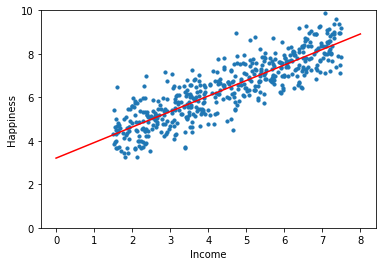

In [61]:
f ,ax = plt.subplots()
ax.scatter(x,y2,s=10)
ax.plot(xspace,yhat2, color='red')
ax.set_ylim(0,10)

ax.set_xlabel('Income')
ax.set_ylabel('Happiness')
plt.show()

## Polinomios

$P(x) = 2 + 5x - 3x^2 + x^3$

In [75]:
poly = np.polynomial.Polynomial(coef=(2,5,-3,1))

In [78]:
xpoly, ypoly = poly.linspace(400,[-4,4])

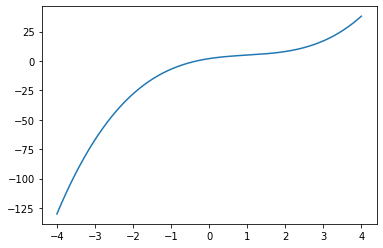

In [79]:
f, ax = plt.subplots()

ax.plot(xpoly,ypoly)

plt.show()

In [85]:
xpoly = xpoly.reshape((400,1))

In [88]:
xpoly1 = np.hstack((xpoly,xpoly))
xpoly1 = np.hstack((xpoly1,xpoly1))

In [90]:
xpoly1[:,2] = xpoly1[:,2]**2
xpoly1[:,3] = xpoly1[:,3]**3

In [97]:
coef_hat = linreg(xpoly1,ypoly)

In [99]:
polyhat = np.polynomial.Polynomial(coef=coef_hat)
xphat, yphat = polyhat.linspace(400,[-4,4])

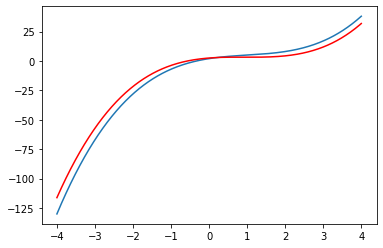

In [100]:
f, ax = plt.subplots()

ax.plot(xpoly,ypoly)
ax.plot(xphat,yphat, color='red')

plt.show()

## Random sample + ruido

In [106]:
idx = np.random.randint(0,400,50)

In [107]:
xsample = xpoly1[idx,:]
ysample = ypoly[idx]

In [117]:
ysample = ysample + np.random.normal(loc=0,scale=4,size = 50)

In [118]:
xsample.shape

(50, 4)

In [121]:
polyHatSample = np.polynomial.Polynomial(coef=linreg(xsample,ysample))
x_poly_sample, y_poly_sample = polyhat.linspace(100,[-4,4])

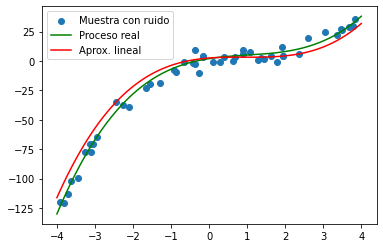

In [125]:
f, ax = plt.subplots()

ax.scatter(xsample[:,0],ysample, label='Muestra con ruido')
ax.plot(xpoly,ypoly, color='green', label='Proceso real')
ax.plot(x_poly_sample,y_poly_sample, color='red', label='Aprox. lineal')
plt.legend()
plt.show()

# Dataset completo

In [22]:
noise = np.random.normal(0,1,(100,1))
x1 = np.random.normal(2,8,(100,1)) + noise
x2 = np.random.normal(1,2,(100,1)) + noise
x3 = np.random.normal(4,4,(100,1)) + noise
x3_ = x3.copy()
x3_[0:25] = np.nan
np.random.shuffle(x3)
x4 = np.random.normal(1,1,(100,1)) + noise
x5 = np.random.normal(-1,3,(100,1)) + noise
x5_ = x5.copy()
x5_[0:15] = np.nan
np.random.shuffle(x5)
x6 = np.random.normal(-3,7,(100,1)) + noise

In [23]:
y = 3 * x1 + x2 - 2*x3 + 5*x4 - 0.2 * x5 + x6

In [24]:
np.isnan(y).sum()

0

In [25]:
X = np.hstack((x1,x2,x3_,x4,x5_,x6))

In [26]:
np.isnan(X).sum(axis=0)

array([ 0,  0, 25,  0, 15,  0])

In [27]:
X2 = np.hstack((X,y))

In [28]:
np.isnan(X2).sum(axis=0)

array([ 0,  0, 25,  0, 15,  0,  0])

In [29]:
np.savetxt('./clase3v2.csv', X2, delimiter = ';')

In [3]:
a = np.loadtxt('./clase3v2.csv', delimiter = ';')

In [4]:
from sklearn import *

In [6]:
pca = decomposition.PCA()